[http://ruishu.io/2016/12/27/batchnorm/](http://ruishu.io/2016/12/27/batchnorm/)

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### No batch norm

In [19]:
tf.reset_default_graph()
def get_scope_variable(scope, name, shape=None):
    with tf.variable_scope(scope, reuse=tf.AUTO_REUSE):
        v = tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())
    return v
def normal_full_layer(input_layer, size, scope):
    return tf.contrib.layers.fully_connected(input_layer, size, activation_fn=None, scope=scope)

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, 1], name="x")
layer1 = tf.nn.relu(normal_full_layer(x, 6, 'layer1'))
y_pred = normal_full_layer(layer1, 1, 'layer2')
y_true = tf.placeholder(tf.float32, shape=[None, 1], name="y_true")

error = tf.reduce_sum( tf.square(y_pred - y_true) )
optimizer = tf.train.AdamOptimizer(learning_rate=0.1) # need to change to Adam (or RMSprops)
train = optimizer.minimize(error)

# Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

steps = 100
history = []
for i in range(steps):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = np.random.uniform(min, max, (200, 1))
    output = np.power(input, 2) - 5
    _, error_val = sess.run([train, error], feed_dict={
                                              x:input, 
                                              y_true:output
                                          })
    history += [error_val]
    print('Current Step: {} '.format(i+1), 'error:', error_val)


Current Step: 1  error: 981006.5
Current Step: 2  error: 2405601.8
Current Step: 3  error: 1849848.4
Current Step: 4  error: 2680704.0
Current Step: 5  error: 3038563.5
Current Step: 6  error: 3874767.5
Current Step: 7  error: 1859793.4
Current Step: 8  error: 432706.78
Current Step: 9  error: 2898445.0
Current Step: 10  error: 589586.56
Current Step: 11  error: 2330722.2
Current Step: 12  error: 475449.34
Current Step: 13  error: 284886.06
Current Step: 14  error: 928545.4
Current Step: 15  error: 223773.44
Current Step: 16  error: 1211471.4
Current Step: 17  error: 539866.56
Current Step: 18  error: 841360.75
Current Step: 19  error: 1056411.0
Current Step: 20  error: 121892.84
Current Step: 21  error: 837545.3
Current Step: 22  error: 172761.75
Current Step: 23  error: 361181.5
Current Step: 24  error: 310923.62
Current Step: 25  error: 287783.6
Current Step: 26  error: 302221.8
Current Step: 27  error: 481689.7
Current Step: 28  error: 413293.5
Current Step: 29  error: 433541.75
Cu

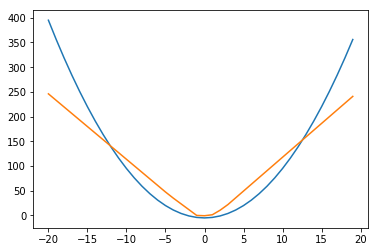

In [20]:
input = np.arange(-20,20).reshape(-1, 1)
output = np.power(input, 2) - 5
y_pred_val = sess.run([y_pred], feed_dict={ x:input })
y_pred_val = np.array(y_pred_val).reshape((-1, 1))
plt.plot(input, output)
plt.plot(input, y_pred_val)

### Batch norm before Activation

In [16]:
tf.reset_default_graph()
def get_scope_variable(scope, name, shape=None):
    with tf.variable_scope(scope, reuse=tf.AUTO_REUSE):
        v = tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())
    return v
def normal_full_layer(input_layer, size, scope, phase):
    return tf.contrib.layers.fully_connected(input_layer, size, activation_fn=None, scope=scope)
    return tf.contrib.layers.batch_norm(linear, 
                              center=True, scale=True, 
                              is_training=phase,
                              scope='bn_'+scope)

tf.reset_default_graph()
phase = tf.placeholder(tf.bool, name='phase')
x = tf.placeholder(tf.float32, shape=[None, 1], name="x")
layer1 = tf.nn.relu(normal_full_layer(x, 6, 'layer1', phase))
y_pred = normal_full_layer(layer1, 1, 'layer2', phase)
y_true = tf.placeholder(tf.float32, shape=[None, 1], name="y_true")


error = tf.reduce_sum( tf.square(y_pred - y_true) )
optimizer = tf.train.AdamOptimizer(learning_rate=1) # need to change to Adam (or RMSprops)
train = optimizer.minimize(error)

# Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

steps = 100
history_bn = []
for i in range(steps):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = np.random.uniform(min, max, (200, 1))
    output = np.power(input, 2) - 5
    _, error_val = sess.run([train, error], feed_dict={
                                              x:input, 
                                              y_true:output,
                                              phase: True
                                          })
    history_bn += [error_val]
    print('Current Step: {} '.format(i+1), 'error:', error_val)


Current Step: 1  error: 2701198.0
Current Step: 2  error: 2074893.2
Current Step: 3  error: 274848.2
Current Step: 4  error: 675536.5
Current Step: 5  error: 487507.9
Current Step: 6  error: 198150.25
Current Step: 7  error: 1097970.1
Current Step: 8  error: 81794.74
Current Step: 9  error: 650995.4
Current Step: 10  error: 834015.56
Current Step: 11  error: 741137.06
Current Step: 12  error: 330585.5
Current Step: 13  error: 386518.47
Current Step: 14  error: 409943.75
Current Step: 15  error: 427631.25
Current Step: 16  error: 300613.8
Current Step: 17  error: 185860.25
Current Step: 18  error: 148300.11
Current Step: 19  error: 400419.53
Current Step: 20  error: 47306.438
Current Step: 21  error: 16390.299
Current Step: 22  error: 38945.266
Current Step: 23  error: 339357.7
Current Step: 24  error: 588203.7
Current Step: 25  error: 106586.484
Current Step: 26  error: 337965.0
Current Step: 27  error: 368093.06
Current Step: 28  error: 235852.16
Current Step: 29  error: 117658.22
Cur

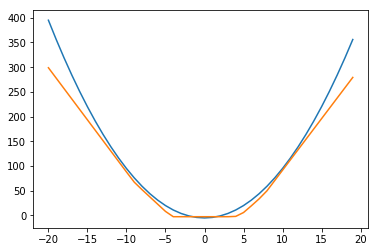

In [17]:
input = np.arange(-20,20).reshape(-1, 1)
output = np.power(input, 2) - 5
y_pred_val = sess.run([y_pred], feed_dict={ x:input, phase:False })
y_pred_val = np.array(y_pred_val).reshape((-1, 1))
plt.plot(input, output)
plt.plot(input, y_pred_val)

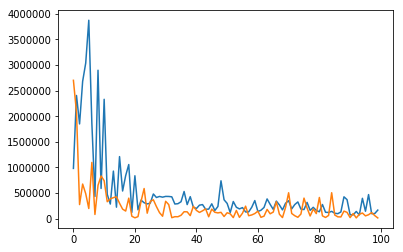

In [21]:
plt.plot(history, label="normal")
plt.plot(history_bn, label="batch norm")